In [1]:
import pandas as pd
import pickle as pkl
from sklearn.linear_model import Ridge

from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, KFold, cross_val_predict

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 10,10

In [2]:
from dairyml import * 

### Load the data

In [3]:
with open("../pkl/data/data_outliers_removed", "rb" ) as f:
    [X, Y] = pkl.load(f)

In [4]:
Y_reshaped = Y.values.reshape(-1,1)

### Modeling with Ridge

In [5]:
splitter= KFold(n_splits=10,shuffle=True,random_state=7)

In [6]:
from scoring import *

In [7]:
try:
    overall_results = pd.read_csv('../reports/cv_results.csv',index_col=0)
except FileNotFoundError:
    overall_results = pd.DataFrame(columns = scoring.keys())

#### Ridge

In [8]:
param_grid = {'alpha': np.logspace(-3, 3, 50)}

refit = 'r2'

search = GridSearchCV(estimator=Ridge(),param_grid=param_grid,scoring=scoring,refit=refit,cv=splitter)
fitted = search.fit(X,Y_reshaped)

In [9]:
model = fitted.best_estimator_
with open("../models/ridge.model", "wb" ) as f:
    pkl.dump(model,f)

In [10]:
search.best_estimator_.alpha

59.636233165946365

In [11]:
search.cv_results_['mean_test_r2'][np.argmax(search.cv_results_['mean_test_'+refit])]

0.41723690809723385

In [12]:
overall_results = scores_to_df(overall_results,'Ridge',search.cv_results_,refit)
overall_results

,cv_test_r2,cv_train_r2,cv_test_SRC,cv_train_SRC,cv_test_PCC,cv_train_PCC,cv_test_MI,cv_train_MI,cv_test_MAE,cv_train_MAE,cv_test_accuracy,cv_train_accuracy,cv_test_recall,cv_train_recall
Dummy Mean,-0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.94,1.93,NaN,NaN,NaN,NaN
Dummy Median All,-0.32,-0.29,0.00,0.00,0.00,0.00,0.01,0.00,1.68,1.68,NaN,NaN,NaN,NaN
Dummy Median Nonzero,-0.08,-0.06,0.00,0.00,0.00,0.00,0.00,0.01,1.77,1.77,NaN,NaN,NaN,NaN
"Perfect Clasif., Mean Regr.",0.13,0.13,0.73,0.73,0.41,0.40,0.47,0.51,1.53,1.53,NaN,NaN,NaN,NaN
Lasso,0.45,0.59,0.61,0.67,0.70,0.78,0.41,0.69,1.23,1.10,NaN,NaN,NaN,NaN
Bounded Lasso,0.55,0.66,0.64,0.69,0.75,0.82,0.42,0.66,1.08,0.97,NaN,NaN,NaN,NaN
Logistic Regression Classifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.89,1.0,0.95,1.0
Bounded Lasso + LogReg,0.64,0.74,0.80,0.89,0.82,0.87,0.61,0.86,0.86,0.74,NaN,NaN,NaN,NaN
Ridge,0.42,0.56,0.60,0.66,0.69,0.76,0.42,0.61,1.23,1.12,NaN,NaN,NaN,NaN


### Bounded Ridge

In [13]:
param_grid = {'alpha': np.logspace(-3, 3, 100)}

refit = 'r2'

search = GridSearchCV(estimator=BoundedRidge(),param_grid=param_grid,scoring=scoring,refit=refit,cv=splitter)
fitted = search.fit(X,Y_reshaped)

In [14]:
model = fitted.best_estimator_
with open("../models/ridge_bounded.model", "wb" ) as f:
    pkl.dump(model,f)

In [15]:
search.best_estimator_.alpha

15.199110829529332

In [16]:
overall_results = scores_to_df(overall_results,'Bounded Ridge',search.cv_results_,refit)

In [17]:
# plot_coefficients(search.best_estimator_,X)

In [18]:
# coefficients = pd.DataFrame()
# coefficients['Feature'] = X.columns
# coefficients = coefficients.set_index('Feature')
# coefficients['coef'] = model.get_coef()
# coefficients.to_csv('ridge_coef.csv')

### Bounded Ridge + LogReg

In [19]:
param_grid = {'alpha': np.logspace(-4, 3, 10), 'C': np.logspace(4, 6, 10)}
refit='r2'
search = GridSearchCV(estimator=BoundedRidgePlusLogReg(),param_grid=param_grid,scoring=scoring,refit=refit,cv=splitter)
fitted = search.fit(X,Y_reshaped)

In [22]:
y_pred = cross_val_predict(search.best_estimator_,X,Y_reshaped,cv=splitter)

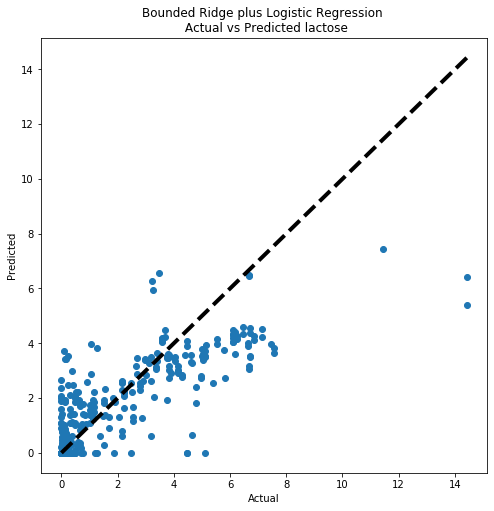

In [23]:
fig, ax = plt.subplots(figsize=[8,8])
ax.scatter(Y, y_pred)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Bounded Ridge plus Logistic Regression \n Actual vs Predicted lactose')
plt.show()

In [24]:
search.best_estimator_.get_params()

{'C': 215443.46900318822, 'alpha': 27.825594022071257}

In [25]:
overall_results = scores_to_df(overall_results,'Bounded Ridge + LogReg',search.cv_results_,refit)
overall_results

,cv_test_r2,cv_train_r2,cv_test_SRC,cv_train_SRC,cv_test_PCC,cv_train_PCC,cv_test_MI,cv_train_MI,cv_test_MAE,cv_train_MAE,cv_test_accuracy,cv_train_accuracy,cv_test_recall,cv_train_recall
Dummy Mean,-0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.94,1.93,NaN,NaN,NaN,NaN
Dummy Median All,-0.32,-0.29,0.00,0.00,0.00,0.00,0.01,0.00,1.68,1.68,NaN,NaN,NaN,NaN
Dummy Median Nonzero,-0.08,-0.06,0.00,0.00,0.00,0.00,0.00,0.01,1.77,1.77,NaN,NaN,NaN,NaN
"Perfect Clasif., Mean Regr.",0.13,0.13,0.73,0.73,0.41,0.40,0.47,0.51,1.53,1.53,NaN,NaN,NaN,NaN
Lasso,0.45,0.59,0.61,0.67,0.70,0.78,0.41,0.69,1.23,1.10,NaN,NaN,NaN,NaN
Bounded Lasso,0.55,0.66,0.64,0.69,0.75,0.82,0.42,0.66,1.08,0.97,NaN,NaN,NaN,NaN
Logistic Regression Classifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.89,1.0,0.95,1.0
Bounded Lasso + LogReg,0.64,0.74,0.80,0.89,0.82,0.87,0.61,0.86,0.86,0.74,NaN,NaN,NaN,NaN
Ridge,0.42,0.56,0.60,0.66,0.69,0.76,0.42,0.61,1.23,1.12,NaN,NaN,NaN,NaN
Bounded Ridge,0.53,0.65,0.63,0.70,0.74,0.82,0.46,0.68,1.10,0.97,NaN,NaN,NaN,NaN


In [26]:
overall_results.to_csv('../reports/cv_results.csv')

In [27]:
model = fitted.best_estimator_
with open("../models/ridge_combined.model", "wb" ) as f:
    pkl.dump(model,f)